## Preamble

In [26]:
from pydci.examples.monomial import monomial
from pydci.MUDProblem import MUDProblem
from scipy.stats.distributions import norm
import numpy as np
import matplotlib.pyplot as plt

__author__ = "Carlos del-Castillo-Negrete"
__copyright__ = "Carlos del-Castillo-Negrete"
__license__ = "mit"

seed = 123456

<a id='Title'></a>
# <center> MUD Problem Class
_____

<center>
    Notebook by:
    <br>
    Carlos del-Castillo-Negrete (<font color='blue'>cdelcastillo21@gmail.com</font>)
</center>

The purpose of this notebook is to demonstrate usage of the `DCIProblem` class and plotting capabilities.

# <a id='Title'></a>
## Data-Consistent Update Formula: 

$\Large \pi_{up}(\lambda) = \pi_{in}(\lambda)\frac{\pi_{ob}(Q(\lambda))}{\pi_{pred}(Q(\lambda))}$


Note:

* $\pi_{in}$ represents initial descripton of aleatoric, or irreducible, uncertainty on $\Lambda$.

* Data-Consistent comes from Disintegration theorem and Bayes rule [ref].


## Example 1 - Low Dimensional Example
---

We start with a simple QoI map over a one-dimensional parameter space:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q(\lambda) = \lambda^5 \rightarrow \mathcal{D} = [-1, 1] $$

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

### Data

We take $N$ samples from an initial uniform distribution over the input parameter space. These samples will be pushed forward through our QoI map to constrcut the predicted density $\pi_{pred}$:

In [32]:
# Number of samples to use, and assumed observed normal distribution parameters
p, num_samples, mu, sigma, domain = 5, int(1e3), 0.25, 0.1, [-1, 1]
lam, q_lam, data = monomial(
    p=p,
    num_samples=num_samples,
    domain=domain,
    mu=mu,
    sigma=sigma,
    N=1000)
lam.shape, q_lam.shape, data.shape

((1000, 1), (1000, 1), (1000,))

In [33]:
# Construct density problem object using lambda samples and QoI Values
# Note by default DensityProblem class assumes uniform distribution over domain if nothing specified
# The predicted distribution will be determined from a Gaussian Kernel Density Estimate over predicted values
# Have to set observed distribution -> assuming known sample mean, 0.25, and std dev, 0.1, from observed data.
mud_prob = MUDProblem(lam, q_lam, data, sigma)
mud_prob.mud_point()

array([0.75593739])

In [34]:
mud_prob.state

,lam_0,q_lam_0,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_pca_0
0,0.487857,0.027635,1.0,0.509564,0.009531,0.000000e+00,0.000000e+00,0.000000e+00,70.327707
1,-0.377928,-0.007710,1.0,0.497120,0.009916,0.000000e+00,0.000000e+00,0.000000e+00,81.504801
2,-0.757362,-0.249183,1.0,0.429458,0.000984,0.000000e+00,0.000000e+00,0.000000e+00,157.865211
3,-0.922125,-0.666728,1.0,0.335090,0.000486,0.000000e+00,0.000000e+00,0.000000e+00,289.904591
4,0.626838,0.096778,1.0,0.527690,0.005671,0.000000e+00,0.000000e+00,0.000000e+00,48.462784
...,...,...,...,...,...,...,...,...,...
995,0.064509,0.000001,1.0,0.482319,0.009972,0.000000e+00,0.000000e+00,0.000000e+00,79.066367
996,0.718764,0.191836,1.0,0.524082,0.001864,1.151549e-74,6.176780e-72,3.237137e-72,18.402785
997,0.170523,0.000144,1.0,0.493915,0.009972,0.000000e+00,0.000000e+00,0.000000e+00,79.021126
998,0.562097,0.056112,1.0,0.519599,0.008209,0.000000e+00,0.000000e+00,0.000000e+00,61.322477


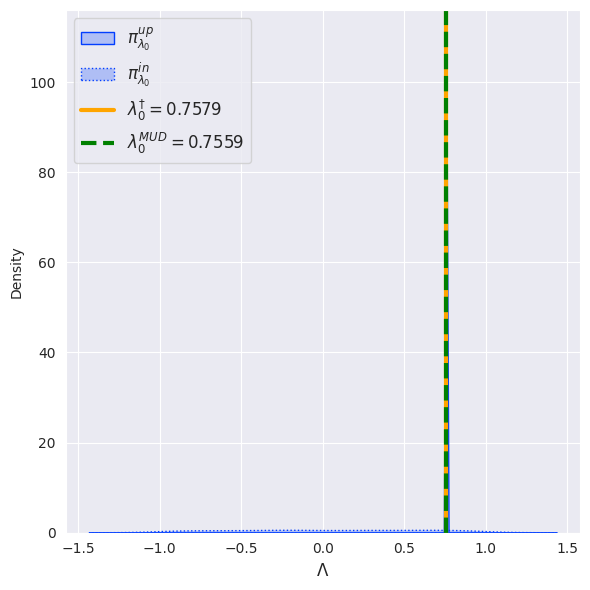

In [35]:
ax = mud_prob.plot_param_state(plot_initial=True, true_vals=[[0.25**0.2]])

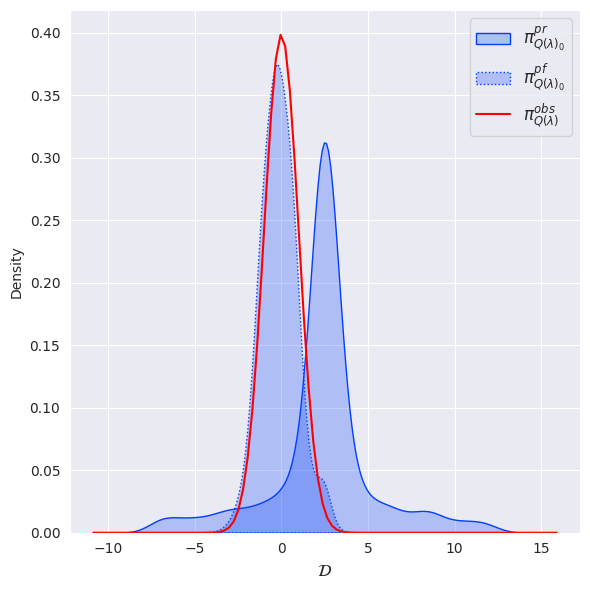

In [22]:
ax = mud_prob.plot_obs_state(plot_pf=True)

## Aggregating More Data

Lets increase the number of data points we use.
We can see how with the $Q_{PCA}$ map we reduce the variance in the MUD estimate as more datapoints are used in the map.

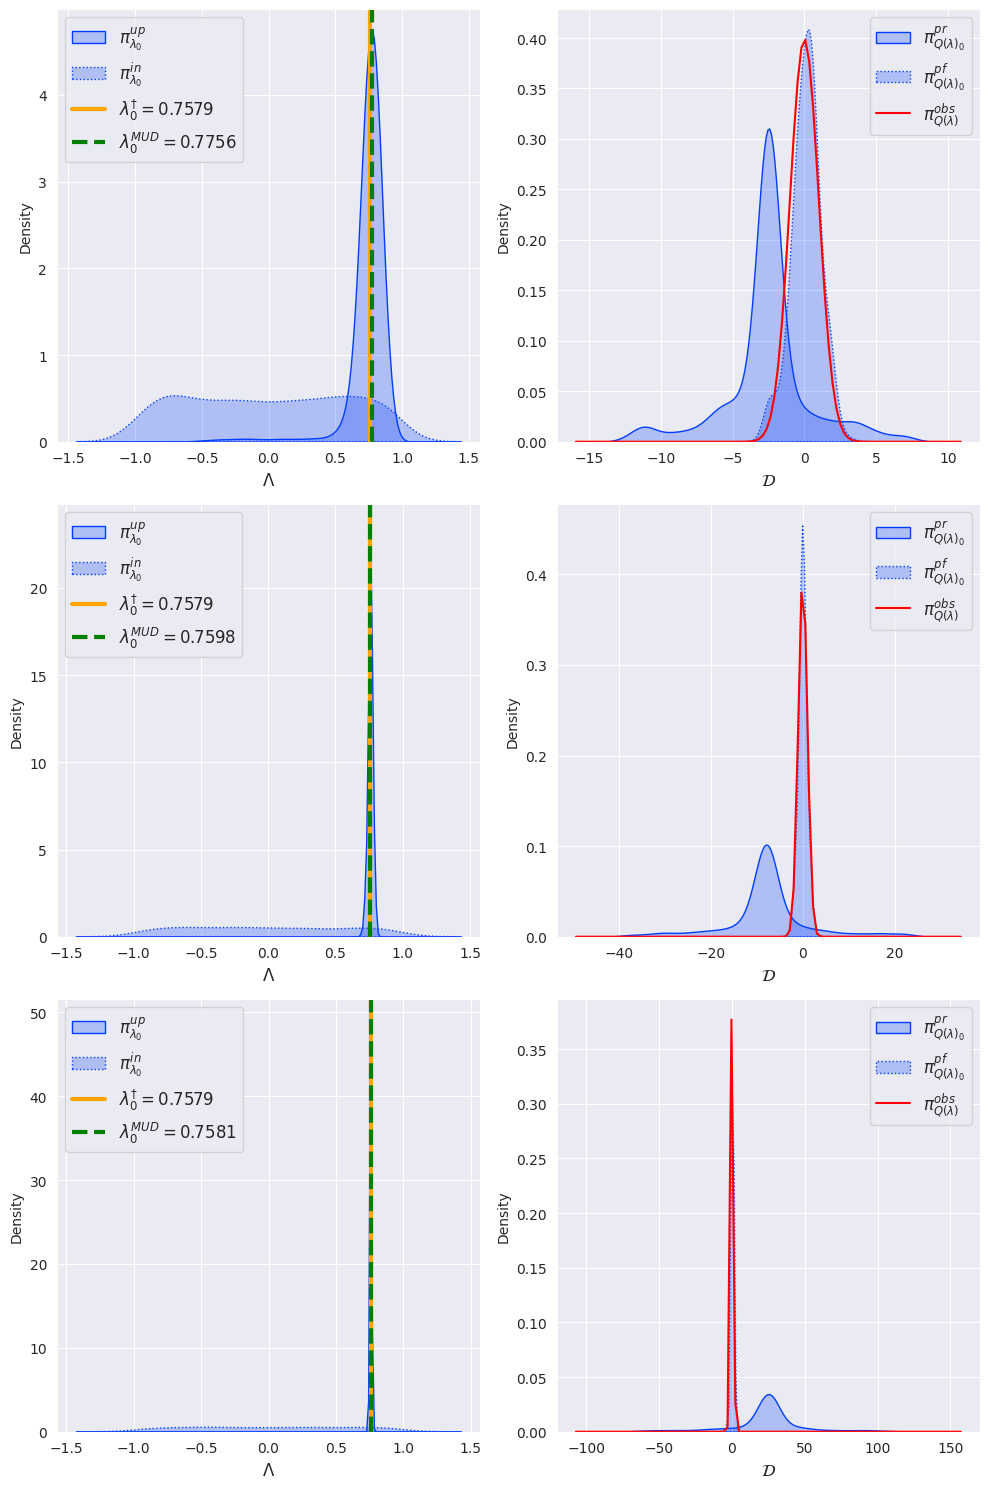

In [31]:
N_vals = [1, 10, 100]

fig, ax = plt.subplots(len(N_vals), 2, figsize=(10, 5*len(N_vals)))

for i, N in enumerate(N_vals):
    lam, q_lam, data = monomial(
        p=p,
        num_samples=num_samples,
        domain=domain,
        mu=mu,
        sigma=sigma,
        N=N)
    mud_prob = MUDProblem(lam, q_lam, data, sigma)
    _ = mud_prob.plot_param_state(plot_initial=True, true_vals=[[0.25**0.2]], ax=ax[i][0])
    _ = mud_prob.plot_obs_state(plot_pf=True, ax=ax[i][1])